## Fractal from Basins of Attraction

We will identify the basins of attraction of the polynomial
$$
f(x) = x^5 - x^4 - 5x^3 - 5x^2 + 4x + 6.
$$

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyder
from numpy.polynomial.polynomial import polyval
from numpy.polynomial.polynomial import polyroots

In [15]:
def newton(P, start, steps=100):
    root = start
    P_deriv = polyder(P)
    for i in range(steps):
        root = root - (polyval(root,P) / polyval(root,P_deriv))
    return root

In [17]:
real_min = -1
real_max = 3
imag_min = -2
imag_max = 2
resolution = 750

x_array = np.linspace(real_min,real_max, resolution * (real_max-real_min) )
y_array = np.linspace(imag_min,imag_max, resolution * (imag_max-imag_min) )

c_array = np.add.outer(x_array,y_array*1j)

In [12]:
steps = 20

for r in polyroots([6,4,-5,-5,-1,1]):
    n = newton([6,4,-5,-5,-1,1], r, steps=steps)
    print('Newton applied to {} yields {} after 20 steps'.format(r, n, steps))

Newton applied to (-1.0000000000000004+0j) yields (-1+0j) after 20 steps
Newton applied to (-1-0.9999999999999994j) yields (-1-1j) after 20 steps
Newton applied to (-1+0.9999999999999994j) yields (-1+1j) after 20 steps
Newton applied to (0.9999999999999992+0j) yields (1+0j) after 20 steps
Newton applied to (3+0j) yields (3+0j) after 20 steps


In [13]:
polyroots([6,4,-5,-5,-1,1])

array([-1.+0.j, -1.-1.j, -1.+1.j,  1.+0.j,  3.+0.j])

In [14]:
r = -1+1j
newton([6,4,-5,-5,-1,1],r,steps=20)

(-1+1j)

In [18]:
fractal_array = newton([6,4,-5,-5,-1,1],c_array)

In [4]:
polyroots([6,4,-5,-5,-1,1])

array([-1.+0.j, -1.-1.j, -1.+1.j,  1.+0.j,  3.+0.j])

In [52]:
def show_block(r,g,b):
    red_channel = np.full((25,50),r, dtype=np.uint8) # 
    green_channel = np.full((25,50),g, dtype=np.uint8)
    blue_channel = np.full((25,50),b, dtype=np.uint8)
  
    solid = np.stack((red_channel,green_channel,blue_channel), axis=-1) # Stack the channels together.
    #print(solid)
    img = Image.fromarray(solid) # Create an image from the array.
    display(img)
    
show_block(1,31,75) # root -1
show_block(3,57,108) # root 3
show_block(0,91,150) # root 1
show_block(100,151,177) # root -1-i
show_block(179,205,224) # root -1+i

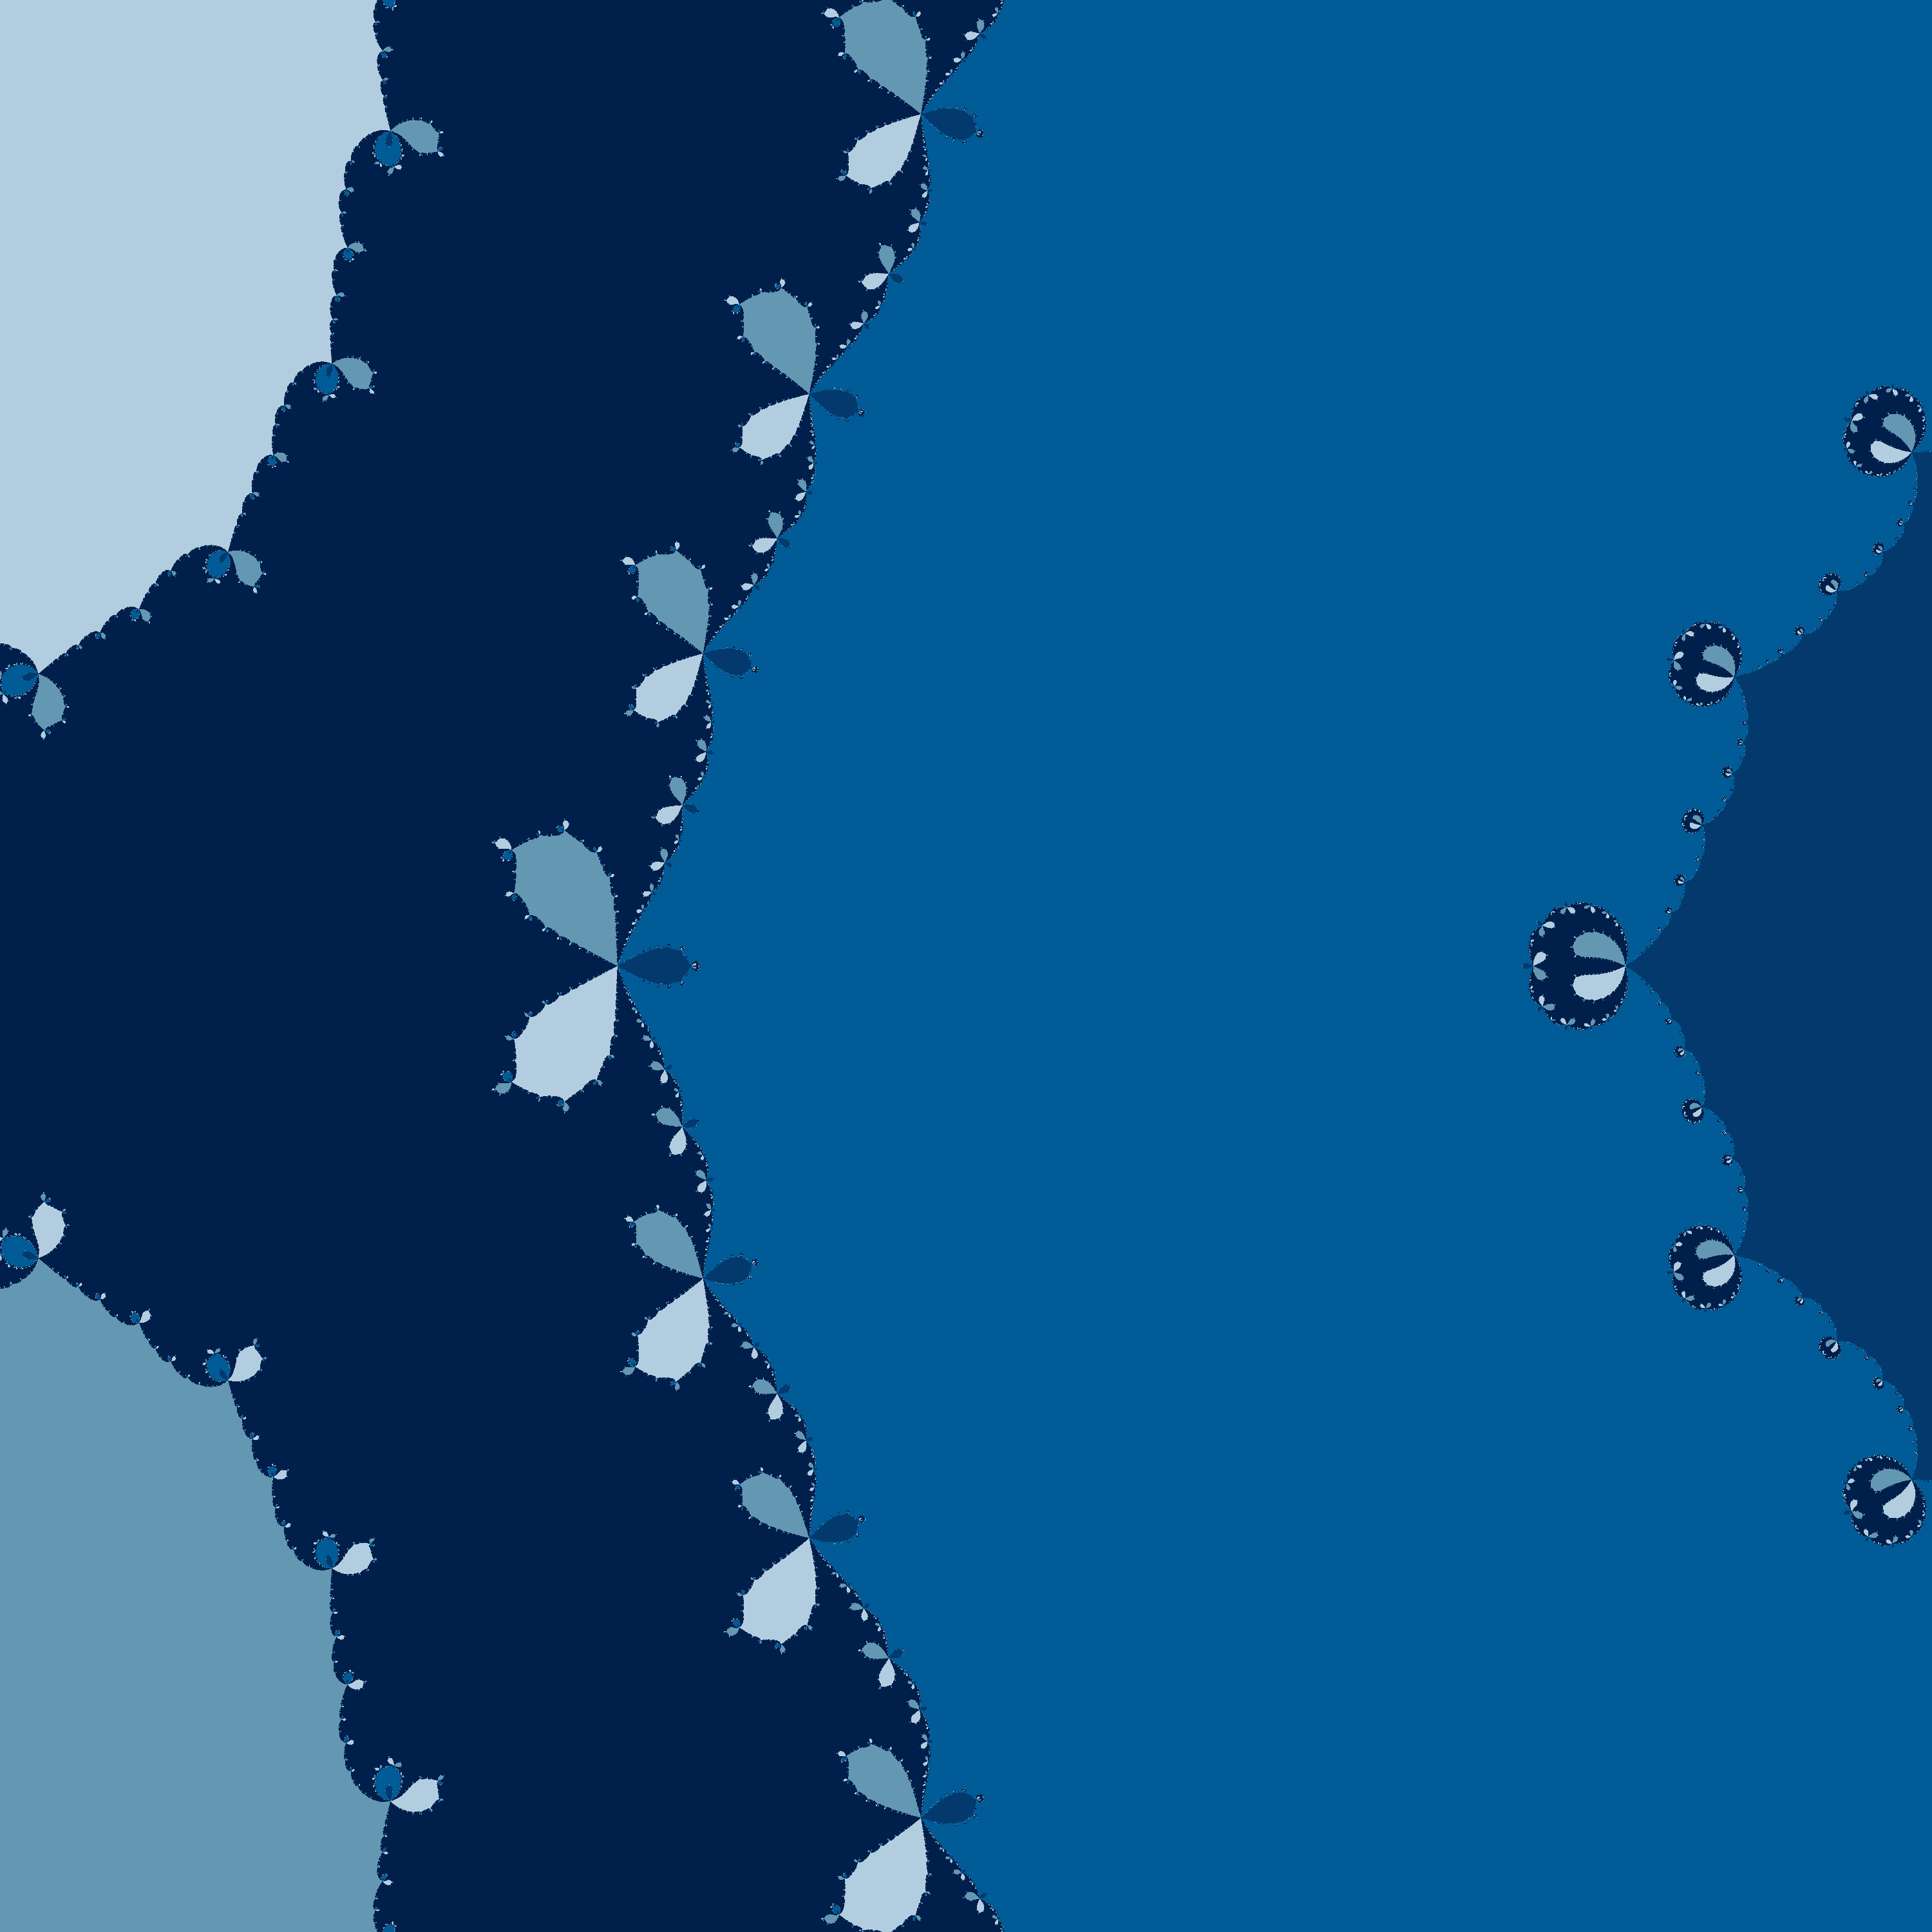

In [20]:
fractal = np.zeros((3000, 3000, 3), dtype=np.uint8)
for x in range(3000):
    for y in range(3000):
        if fractal_array[x,y].imag == 0: # Real roots
            if fractal_array[x,y].real < 0: # -1
                fractal[y,x] = [1,31,75]
            if fractal_array[x,y].real > 0: # Positive real roots
                if fractal_array[x,y].real > 2: # 3
                    fractal[y,x] = [3,57,108]
                else:
                    fractal[y,x] = [0,91,150] # 1
        if fractal_array[x,y].imag < 0: # -1-i
            fractal[y,x] = [100,151,177]
        if fractal_array[x,y].imag > 0: # -1+i
            fractal[y,x] = [179,205,224]

fractal = np.flip(fractal, 0) # Vertical flip to compensate for the way PIL compiles values
img = Image.fromarray(fractal)
display(img)

In [21]:
img.save('fractal.png')

## Convergence Speed

In [3]:
realstep_min = -1
realstep_max = 3
imagstep_min = -2
imagstep_max = 2
resolution = 100

realpart_array = np.linspace(realstep_min,realstep_max, resolution * (realstep_max-realstep_min) )
imagpart_array = np.linspace(imagstep_min,imagstep_max, resolution * (imagstep_max-imagstep_min) )

c_array = np.add.outer(realpart_array,imagpart_array*1j)
dummyc_array = c_array.flatten()
realpart = dummyc_array.real
imagpart = dummyc_array.imag

In [4]:
def newton_step(z): #input a complex number
    step = 0
    orig = z
    P = [6,4,-5,-5,-1,1]
    P_deriv = polyder(P)
    root = newton(P,z)
    while abs((orig-root).real) > 0.00001 and abs(orig-root.imag) > 0.00001:
        orig = orig - (polyval(orig,P) / polyval(orig,P_deriv))
        step += 1
    return step

In [5]:
%timeit newton_step(2-0.142j)

3.01 ms ± 19.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
step_array = np.array([])
for z in dummyc_array:
    step_array = np.append(step_array,[newton_step(z)])

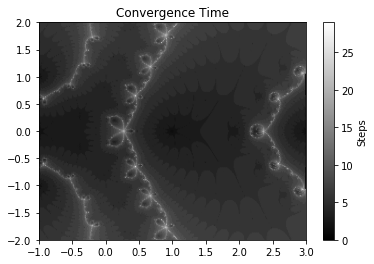

In [10]:
x = realpart
y = imagpart
z = step_array
xmin = realpart_array.min()
xmax = realpart_array.max()
ymin = imagpart_array.min()
ymax = imagpart_array.max()

plt.hexbin(x, y,C=z,gridsize=(400,200), cmap=plt.cm.gray) #C forces values into each bin
cb = plt.colorbar()
cb.set_label('Steps')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.title('Convergence Time')
plt.show()

I did *not* expect it to match the fractal. I guess what this shows is that the numbers closer to the borders between basins of attraction take longer to converge, which makes sense.